農研機構メッシュ農業気象データシステム(AMGSDS) 　ドキュメント<br>
チュートリアル　５ 地理情報の利用

# 地理情報の利用
　このチュートリアルでは、メッシュ農業気象データシステムで利用できる地理情報と、その利用法について学習します。

　まず、以下のセルを実行し、このチュートリアルで使用するライブラリを読み込んでください。<br>

In [1]:
# このチュートリアルで使用するライブラリ

import numpy as np
import AMD_Tools4 as amd

## 1 関数 GetGeoData
　メッシュ農業気象データシステムからは、気象データと組み合わせて利用することを想定した、数種類の地理情報が提供されています。これらは、ライブラリ AMD_Tools4 に収録される関数 GetGeoData で取得します。

```Python
AMD_Tools4.GetGeoData(nani, doko, namuni=False, url='https://amd.rd.naro.go.jp/opendap/AMD/')
```
引数(必須)：<br>
* **nani**： 地理情報の記号で、'altitude'などの文字列で与える
* **doko**： 取得するデータの緯度と経度の範囲で、[36.0, 40.0, 130.0, 135.0] のように緯度経度の順で範囲の最小値と最大値を指定する。特定メッシュのデータを取得するときは、それぞれの最小値と最大値に同じ値を与える。
  
引数(必要なときだけ使用)：<br>
* **namuni**: namuni=True とすると、関数の戻り値に、地理情報の正式名称と単位が追加される。
* **url**: 気象データを取り出す場所を指定する。省略した場合は**農研機構のデータ配信サーバー** からデータを取得する。

戻り値：<br>
* **第1戻り値**： 指定した地理情報の２次元配列。（緯度、経度）の次元を持つ。範囲の指定の仕方にかかわらず常に２次元となる。
* **第2戻り値**： 切り出した地理情報の緯度の１次元配列。値は浮動小数。
* **第3戻り値**： 切り出した地理情報の経度の１次元配列。値は浮動小数。
* **第4戻り値**(引数に namuni=True を加えたときのみ)： 地理情報の正式名。文字列。
* **第5戻り値**(引数に namuni=True を加えたときのみ)： 地理情報の単位。文字列。

#### 使用する際には、ライブラリ **AMD_Tools4** をあらかじめインポートしておきます。

## 2 データの取得
　高知県の室戸岬先端周辺の、下図に示す 30 メッシュの領域の地理情報を実際に取得してみましょう。メッシュの平均標高を取得します。

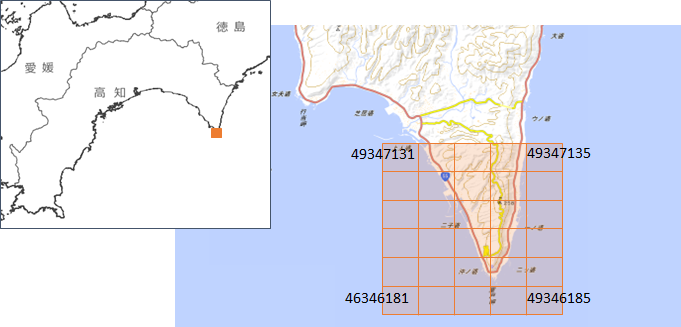

　第１引数に与える地理情報の記号は、平均標高に対して **altitude** です。なお、提供されている地理情報とその記号は、下記リンクで確認することができます。<br>
https://amu.rd.naro.go.jp/wiki_open/doku.php?id=geodata

　関数 **GetGeoData** は、第２引数で指定した領域に少しでも掛かれば、そのメッシュのデータも取得する仕様なので、範囲指定の際、メッシュ範囲外縁の緯度経度を与えると、数値の丸めの関係から、余分な３次メッシュが取得されることがあります。これを避けたい場合は、外縁ではなくメッシュの中心点の緯度経度座標を与えるとよいでしょう。このやり方では、第３引数に与えるリストは **[33.2375, 33.2792, 134.1437, 134.1938]** となります。

In [2]:
# 変数に取得条件を設定
nani = 'altitude'                              # 地理情報の指定　altitudeは３次メッシュの平均標高
doko = [33.2375, 33.2792, 134.1437, 134.1938]  # 領域の設定　

# 設定に基づき地理情報を取得
data, lat, lon, nam, uni = amd.GetGeoData(nani, doko, namuni=True)


altitude (6, 5) Tile


　上のスクリプトを実行し、「altitude (6, 5)」と表示されたらデータは正常に取得されています。この表示は、標高（altitude）のデータが、緯度方向に6データ、経度方向に5データのサイズで取得されたことを示しています。

　関数 GetGeoData は、オプションのキーワード引数 ```namuni=True``` とともに用いると関数の左辺にある5つの変数に、**データ本体**、**緯度**、**経度**、**名称** 、**単位**  をこの順に代入します。いずれも、２次元のまたは１次元の **Numpy.ndarray** オブジェクトです。したがって、これらの配列から特定のデータを得る方法は気象データと同じです。

　それぞれの中身を表示させます。

In [3]:
print(data)
print(lat)
print(lon)
print(nam)
print(uni)

[[ nan  nan  nan  nan  nan]
 [ nan  nan  36.  50.  nan]
 [ nan  nan  56. 100.  nan]
 [ nan   1.  82. 117.  nan]
 [ nan  23. 114. 124.  nan]
 [ nan  57. 141. 113.  nan]]
[33.237503 33.245834 33.25417  33.2625   33.270836 33.279167]
[134.14375 134.15625 134.16875 134.18124 134.19374]
Mean altitude of the grid square
m a.s.l


## 3 地理情報によるメッシュデータのマスク
　GetMetData関数等は、取得する気象データの範囲を緯度経度でしか指定できませんが、地理情報を使うと、特定の都道府県だけや、特定の土地利用だけの気象分布などを得ることができます。

#### 例１
　2024年7月23日における青森県の日最高気温分布を得る。

　まず、青森県が完全に納まる範囲の日最高気温データを取得しましょう。以下を実行して、データの取得、図化をしてください。

TMP_max (1, 161, 176) Tile


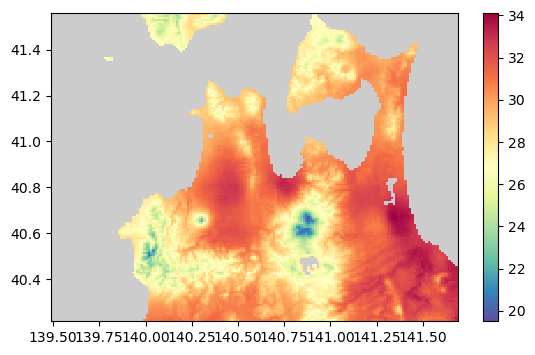

In [4]:
# 変数に取得条件を設定
nani = 'TMP_max'
itsu = ['2024-07-23','2024-07-23']
doko = [40.217, 41.558, 139.490, 141.685]  # 青森県がすっぽり入る領域を選ぶ

# 設定に基づき気象データを取得
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko)
Ta = data[0,:,:]

# 図化
amd.mapfig(Ta, lat, lon)

　次に、以下を実行して、青森県が完全に納まる範囲の県域を示す地理情報を取得し、図化してください。

pref_0200 (161, 176) Tile


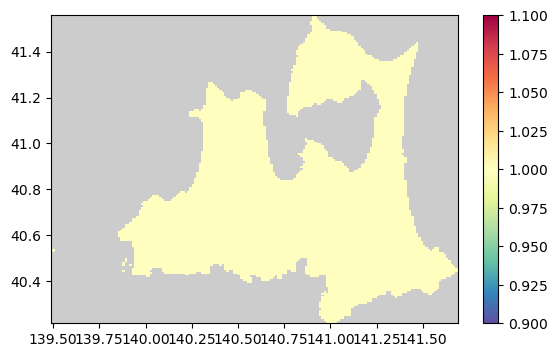

In [5]:
# 設定に基づき地理情報を取得
prf, lat, lon = amd.GetGeoData('pref_0200', doko) # doko は上のスクリプトで定義済み

# 図化
amd.mapfig(prf, lat, lon)

　地理情報 **pref_0200** は、青森県に含まれるメッシュには１、それ以外のメッシュには無効値が与えられている地理情報です。ごく一部でも県域がかかっていればそのメッシュには１が与えられています。

　Numpyの決まりで、何かの数値に無効値を掛け算するとその結果は無効値になります。このため、気象データ **Ta** に地理情報 **prf** を乗じると、青森県域外のデータは全て無効値となり、結果として、青森県域だけの気象データを作ることができます。

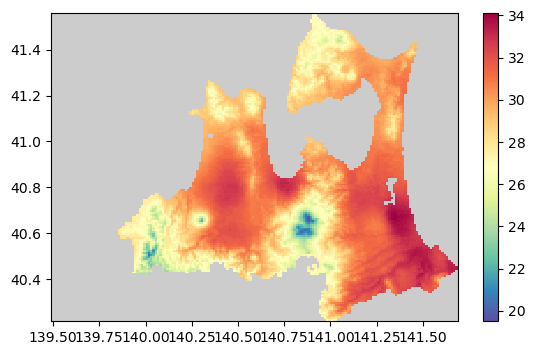

In [6]:
# 気象データを県域データでマスク
TaA = Ta * prf

# 図化
amd.mapfig(TaA, lat, lon)

　個々の都道府県、総合振興局がちょうど納まる緯度経度範囲については、下記に一覧表が掲載されています。<br>
 https://amu.rd.naro.go.jp/wiki_open/doku.php?id=geodata#都道府県範囲　

#### 例２
　青森県周辺域の田の分布を得る。

　地理情報 **landuse_H210100** は、メッシュ内に含まれる田(湿田・乾田・沼田・蓮田)の割合を示す地理情報です。まずこれを図化してみましょう。以下を実行してください。

landuse_H210100 (161, 176) Tile


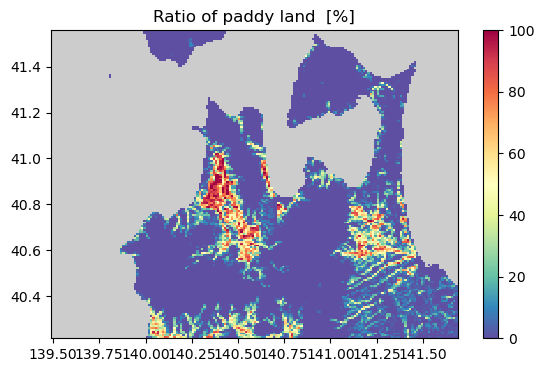

In [7]:
# 田分布率データの取得
lu01, lat, lon, nam, uni = amd.GetGeoData('landuse_H210100', doko, namuni=True)

# 図化
amd.mapfig(lu01, lat, lon, figtitle=f'{nam}  [{uni}]')

　田の分布は、**田の比率が０でない** メッシュを抽出すれば得ることができます。これには、ライブラリ **Numpy** が提供する関数 **where** を使用します。<br>
　関数 **where** は、第１引数に配列の条件式を与え、それが満たされた場合の値を第２引数に、満たされない場合の値を第３引数に与えて使用します。これにより、どちらかの値が埋め込まれた新しい配列が条件式に使用したのと同じサイズで作成されます。今回の例では、以下のように使用することで、比率が０であれば無効値が、比率が０でなければ１である配列 **pad** を得ることができます。
```Python
pad = np.where(lu01>0, 1, np.nan)
```
　ここで、np.nanは、今まで「無効値」と説明してきたものです。ライブラリ Numpy に定義されている数値です。

上の演算で、田の分布図が得られるか確認しましょう。以下を実行してください。

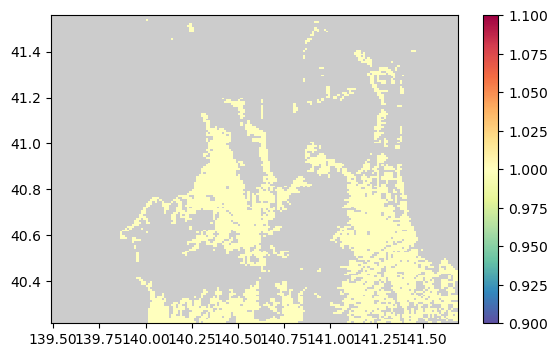

In [8]:
# 田の比率が０でないメッシュを抽出
pad = np.where(lu01>0, 1, np.nan)

# 図化
amd.mapfig(pad, lat, lon)

#### 例３
青森県、かつ、田が存在するメッシュにおける2024年7月23日(大暑)の日最高気温分布を得る。

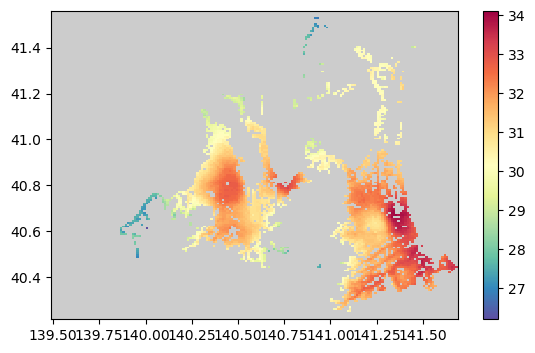

In [9]:
# 二つの条件の「かつ」で気象データにマスクを掛ける
TaAp = Ta * prf * pad

# 図化
amd.mapfig(TaAp, lat, lon)

#### 例４
根釧地域のみ１、それ以外は無効値の地理情報を作る。

　例３でみたように、二つの地理条件の「**かつ**」は、地理条件を示す配列(満たせば１満たさなければ無効値)の掛け算で簡単に得られましたが、地理条件の和集合「**または**」は足し算では得られず、関数 **where** を使用しなければなりません。<br>
　釧路総合振興局の領域だけが１の配列を **kushiro**、根室総合振興局の領域だけが１の配列を  **nemuro** とすると、それらの「**または**」 **konsen** は以下のように得ます。
```python
konsen =  np.where((kushiro==1)|(nemuro==1), 1, np.nan)
```
この際、データを取得する領域は、釧路と根室の両方が入る領域に設定します。
 
　この例では、以下のようになります。

pref_0113 (176, 184) Tile
pref_0114 (176, 184) Tile


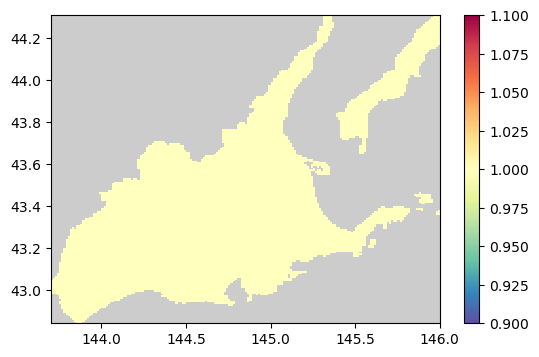

In [10]:
# 変数に取得条件を設定
doko = [42.842,  44.305, 143.702, 145.998]  # 根室と釧路の両方が入る領域を設定する

# 領域データの取得
kushiro, la, lo = amd.GetGeoData('pref_0113', doko)
nemuro, la, lo = amd.GetGeoData('pref_0114', doko)

# 和集合の領域データ
konsen = np.where((kushiro==1)|(nemuro==1), 1, np.nan)

# 分布図
amd.mapfig(konsen, la, lo)

**(!)** 重要<br>
　今回は配列の値と実数(1)との比較だったので、比較演算子「 **==** 」を使用しましたが、比較演算子は無効値には使用できない(無効値かどうかを比較演算子で調べることはできない)ので注意してください。無効値かどうかを調べるには、ライブラリ Numpy が提供する関数 **numpy.isnan** を使用します。

In [11]:
a = np.nan  # 変数aに無効値を代入
a == np.nan  # a が無効値かどうかを知るために比較演算子を使うと・・・

False

In [12]:
np.isnan(a)  # 関数 isnan を使わなければなりません

True

　特に、「無効値でないならば、」の時は、関数**np.isnan()** の先頭に、否定の演算子 *~* (チルダ)を付け、**\~np.isnan()** として使用します。

## 4 地理情報等による処理対象メッシュの設定
　地理情報等によりマスクを掛ける方法は、領域全体のデータがすでに揃っている場合に対しては大変有効ですが、収穫適期分布図など、個々のメッシュに対して一定の計算をした結果をマスクする場合は、計算結果をムダに捨てることになり非効率的です。また、捨てるメッシュでは、データがなくそもそも計算ができない場合もあります。<br>
　このようなときは、計算対象とするメッシュのインデックスを予めリストアップし、それらだけに計算を行って結果を書き込むようにします。

#### 例１
　室戸岬の先端付近において、標高が100以上のメッシュのインデックスをリストアップする

　処理対象のメッシュのインデックスをリストアップするするには、関数 **where** を、３章で示したのとは別な用法で用います。
```Python
条件を満たす配列のインデックス = np.where(配列の要素の条件式)
```
　この用法で、室戸岬の先端付近において、標高が100以上のメッシュのインデックスをリストアップしてみましょう。

In [13]:
# 変数に取得条件を設定
nani = 'altitude'                              # 地理情報の指定　altitudeは３次メッシュの平均標高
doko = [33.2375, 33.2792, 134.1437, 134.1938]  # 領域の設定　

# 設定に基づき地理情報を取得
alt, lat, lon = amd.GetGeoData(nani, doko)

# 条件を満たすインデックスをリストアップ
y,x = np.where( alt>=100.0) # 標高が100以上である要素のインデックス

print(alt)
print(len(y))
print(y)
print(x)

altitude (6, 5) Tile
[[ nan  nan  nan  nan  nan]
 [ nan  nan  36.  50.  nan]
 [ nan  nan  56. 100.  nan]
 [ nan   1.  82. 117.  nan]
 [ nan  23. 114. 124.  nan]
 [ nan  57. 141. 113.  nan]]
6
[2 3 4 4 5 5]
[3 3 2 3 2 3]


　関数 where から返される **y** と **x** の値をひとつづつ抜き出して、インデックスとしたときの配列要素、この場合では、[2,3], [3,3], [4,2], [4,3], [5,2], [5,3] が条件を満たすメッシュのインデックスです。全部で６個存在します。

　では、得られたインデックスを用いて、標高が100 m 以上であれば100、未満であれば無効値である新しいメッシュデータを作成してみましょう。<br> 
　そのためには、まず、結果を格納する新しい配列を用意する必要があります。この方法はいくつかあります。正攻法では、サイズが同じで値が無効値である配列をライブラリ Numpy の関数で作る方法です。それには以下のようにします。
```Python
a100 = np.full(alt.shape,np.nan)
```
　手抜きですが、サイズが同じ配列を探してきて、それに無効値を掛けてしまう方法もあります。
```Python
a100 = alt * np.nan
```
　ndarray オブジェクトは、スカラーと演算をすることができ、その場合、個々の配列要素とスカラーが演算されてその結果を要素とする新しいオブジェクトが作られます。上の方法はそれを利用しています。

In [14]:
a100 = np.full(alt.shape, np.nan)
a100

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

　次に、リストアップされたインデックスの配列要素に値 100 を順次代入します。それにはfor文を以下のように使用します。

In [15]:
for Y,X in zip(y,x):  # 条件を満たすインデックスを順にX,Yに代入する
    a100[Y,X] = 100  # インデックスの値がX,Yである配列要素の値を100にする
    
print(a100)

[[ nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan]
 [ nan  nan  nan 100.  nan]
 [ nan  nan  nan 100.  nan]
 [ nan  nan 100. 100.  nan]
 [ nan  nan 100. 100.  nan]]


 この例では、単に100を代入しただけですが、for文の中に、演算を定義すれば、リストアップされた配列要素に対してだけその演算が実行され結果が書き込まれます。

#### 例２　青森県の田における2024年7月23日の日最高気温分布を得る

　インデックスのリストアップとそれに基づく処理の方法が分かったところで、_３章 例３_ と同じ結果をこの方法で得てみましょう。それは以下のようになります。

TMP_max (1, 161, 176) Tile
pref_0200 (161, 176) Tile
landuse_H210100 (161, 176) Tile


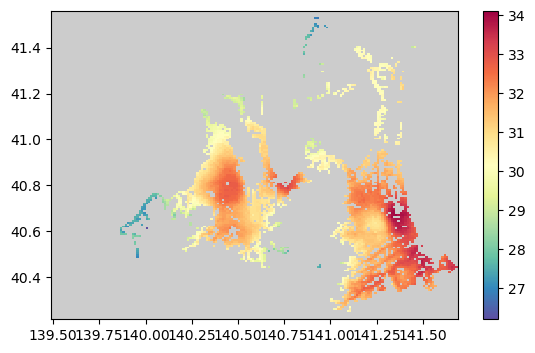

In [16]:
itsu = ['2024-07-23','2024-07-23']  # 気象データの期間
doko = [40.217, 41.558, 139.490, 141.685]  # 青森県がすっぽり入る領域を選ぶ

data, tim, lat, lon = amd.GetMetData('TMP_max', itsu, doko)  # 気象データ
Ta = data[0,:,:]
met = np.where(~np.isnan(Ta), 1, np.nan)  # 気象データの有無
prf, lat, lon = amd.GetGeoData('pref_0200', doko)  # 県域
lu01, lat, lon = amd.GetGeoData('landuse_H210100', doko)  # 田分布率データ
pad = np.where(lu01>0, 1, np.nan)  # 田の有無

TaAp = np.full(Ta.shape,np.nan)  # 演算結果を格納する配列

y,x = np.where(met*prf*pad == 1)  # 処理対象のインデックスのリストアップ
for Y,X in zip(y,x):
    TaAp[Y,X] = Ta[Y,X]  # 気象データの代入

amd.mapfig(TaAp,lat,lon)

　「 _3 地理情報によるメッシュデータのマスク　例３_ 」と同じ結果が得られました。
 
##### 注意
　上のスクリプトでは、6行目で「気象データが存在すればそのメッシュには１、それ以外は無効値」という配列 **met** を作り、それもリストアップ条件に使用しました。処理対象のインデックスをリストアップする方法においては、これは必ずするようにしてください。<br>
　気象データを作る/作らないは気象庁が作成した基礎データに基づいて決定している一方、土地利用データ等地理情報は総務省の基礎データに基づいて作成しているため、「ここは海である」等の判断がすべてのメッシュに対して整合しているわけではないからです。この食い違いにより、ごくまれに、地理情報としては計算対象だが、そこの気象データは存在しないという状況が発生します。気象データの存在もリストアップの条件に入れることで、そのような状況で発生するエラーを防ぐことができます。

以上で、チュートリアル５「地理情報の利用」は終わりです。　お疲れさまでした。